# Stacked Autoencoder (SAE) Tutorial

## Introduction

A Stacked Autoencoder (SAE) is a deep neural network consisting of multiple layers of autoencoders stacked on top of each other. Each layer learns a compressed representation of the previous layer's output, enabling the model to learn hierarchical feature representations.

## Architecture

An SAE consists of multiple encoder-decoder pairs, where the output of one pair is the input to the next pair.

### Encoder

The encoder function for the $i$-th layer, $h_i = f_i(h_{i-1})$, maps the input $h_{i-1}$ to a hidden representation $h_i$. Mathematically, this can be written as:

$$
h_i = f_i(h_{i-1}) = \sigma(W_i h_{i-1} + b_i)
$$

where:
- $W_i$ is a weight matrix for the $i$-th layer
- $b_i$ is a bias vector for the $i$-th layer
- $\sigma$ is an activation function (e.g., ReLU, sigmoid)

### Decoder

The decoder function for the $i$-th layer, $\hat{h}_{i-1} = g_i(h_i)$, maps the hidden representation $h_i$ back to the previous layer's space. Mathematically, this can be written as:

$$
\hat{h}_{i-1} = g_i(h_i) = \sigma(W_i' h_i + b_i')
$$

where:
- $W_i'$ is a weight matrix for the $i$-th layer
- $b_i' is a bias vector for the $i$-th layer
- $\sigma$ is an activation function

### Loss Function

The loss function for an SAE is typically the mean squared error (MSE) between the input and the reconstructed output for each layer:

$$
L = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

## Training Process

Training an SAE involves two main steps:
1. **Layer-wise Pretraining**: Each layer is trained as an autoencoder to learn a compressed representation of the input.
2. **Fine-tuning**: The entire network is trained end-to-end to minimize the reconstruction error.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W_i'$ is:

$$
\frac{\partial L}{\partial W_i'} = \frac{\partial L}{\partial \hat{h}_{i-1}} \cdot \frac{\partial \hat{h}_{i-1}}{\partial W_i'}
$$

Since $\hat{h}_{i-1} = \sigma(W_i' h_i + b_i')$, we have:

$$
\frac{\partial \hat{h}_{i-1}}{\partial W_i'} = h_i \cdot \sigma'(W_i' h_i + b_i')
$$

Thus,

$$
\frac{\partial L}{\partial W_i'} = (h_{i-1} - \hat{h}_{i-1}) \cdot \sigma'(W_i' h_i + b_i') \cdot h_i^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W_i$ is:

$$
\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial h_i} \cdot \frac{\partial h_i}{\partial W_i}
$$

Since $h_i = \sigma(W_i h_{i-1} + b_i)$, we have:

$$
\frac{\partial L}{\partial h_i} = \frac{\partial L}{\partial \hat{h}_{i-1}} \cdot \frac{\partial \hat{h}_{i-1}}{\partial h_i} = (h_{i-1} - \hat{h}_{i-1}) \cdot \sigma'(W_i' h_i + b_i') \cdot W_i'^T
$$

And,

$$
\frac{\partial h_i}{\partial W_i} = h_{i-1} \cdot \sigma'(W_i h_{i-1} + b_i)
$$

Thus,

$$
\frac{\partial L}{\partial W_i} = [(h_{i-1} - \hat{h}_{i-1}) \cdot \sigma'(W_i' h_i + b_i') \cdot W_i'^T] \cdot h_{i-1}^T \cdot \sigma'(W_i h_{i-1} + b_i)
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W_i \leftarrow W_i - \eta \frac{\partial L}{\partial W_i}
$$

$$
b_i \leftarrow b_i - \eta \frac{\partial L}{\partial b_i}
$$

where $\eta$ is the learning rate.

# Advantages and Drawbacks

## Advantages
- **Hierarchical Feature Learning**: SAEs can learn hierarchical feature representations, making them suitable for complex tasks.
- **Improved Performance**: The deeper architecture allows the model to capture more complex patterns in the data.
- **Layer-wise Pretraining**: Each layer can be pretrained separately, which can help with convergence and performance.

## Drawbacks
- **Increased Complexity**: The deeper architecture increases the complexity of the model, making it more computationally expensive to train.
- **Risk of Overfitting**: The larger number of parameters increases the risk of overfitting, especially if the dataset is not sufficiently large.
- **Training Time**: Training SAEs can be time-consuming due to the multiple layers and the need for fine-tuning.


## Innovations and Techniques

### Layer-wise Pretraining

Layer-wise pretraining initializes each layer of the SAE as a separate autoencoder. This process helps in:
- **Avoiding Vanishing Gradients**: Training each layer individually helps to avoid vanishing gradients, especially in deep networks.
- **Initialization**: The pretraining phase initializes the weights in a way that improves convergence during fine-tuning.

### Fine-tuning

After layer-wise pretraining, the entire network is fine-tuned end-to-end using backpropagation to minimize the reconstruction error. Fine-tuning enables:
- **Integration of Layers**: Fine-tuning allows the layers to work together to improve the overall reconstruction quality.
- **Adjustment of Parameters**: Fine-tuning adjusts the weights across all layers to better capture complex patterns in the data.

### Activation Functions

Choosing appropriate activation functions (e.g., ReLU, sigmoid) for each layer is crucial. ReLU is commonly used in hidden layers to introduce non-linearity and accelerate convergence, while sigmoid or softmax are used in the output layer depending on the nature of the data.


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 44s 157ms/step - loss: 0.1901 - val_loss: 0.1181
Epoch 2/50
235/235 [==============================] - 12s 50ms/step - loss: 0.1067 - val_loss: 0.0990
Epoch 3/50
235/235 [==============================] - 12s 50ms/step - loss: 0.0932 - val_loss: 0.0887
Epoch 4/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0871 - val_loss: 0.0852
Epoch 5/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0836 - val_loss: 0.0816
Epoch 6/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0811 - val_loss: 0.0802
Epoch 7/50
235/235 [==============================] - 12s 53ms/step - loss: 0.0792 - val_loss: 0.0788
Epoch 8/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0780 - val_loss: 0.0772
Epoch 9/50
235/235 [==============================] - 12s 52ms/step - loss: 0.0768 - val_loss: 0.0756
Epoch 10/50
235/

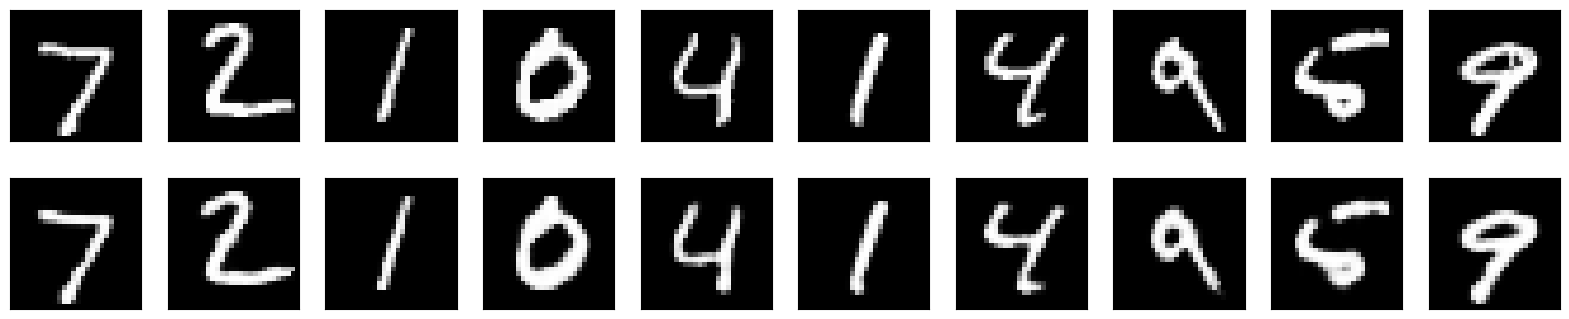

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the SAE architecture
input_dim = 784
encoding_dim1 = 512
encoding_dim2 = 256
encoding_dim3 = 128

inputs = Input(shape=(input_dim,))
encoded1 = Dense(encoding_dim1, activation='relu')(inputs)
encoded2 = Dense(encoding_dim2, activation='relu')(encoded1)
encoded3 = Dense(encoding_dim3, activation='relu')(encoded2)
decoded3 = Dense(encoding_dim2, activation='relu')(encoded3)
decoded2 = Dense(encoding_dim1, activation='relu')(decoded3)
decoded1 = Dense(input_dim, activation='sigmoid')(decoded2)

# Create SAE model
autoencoder = Model(inputs, decoded1)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the SAE
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()